# **Fradulent Insurance Claim Detection**
## **Rohan Rajagopalan**

I will train a Support Vector Classifier, K-Nearest Neighbor Classifier, Decision Tree Classifier, Random Forest Classifier, and a Convolutional Neural Network to be able to identify fradulent insurance claims through binary classification.

Packages Used:
Scikit-learn,
Seaborn, Matplotlib, Pandas, NumPy



### Dataset
https://www.kaggle.com/datasets/buntyshah/auto-insurance-claims-data

## Import Packages and CSV

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

%matplotlib inline

In [2]:
df = pd.read_csv("/content/insurance_claims.csv")

## Read and understand the data

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [6]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

# ***Preprocessing***


## Missing Values

In [7]:
df.replace('?', np.nan, inplace = True)
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [8]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

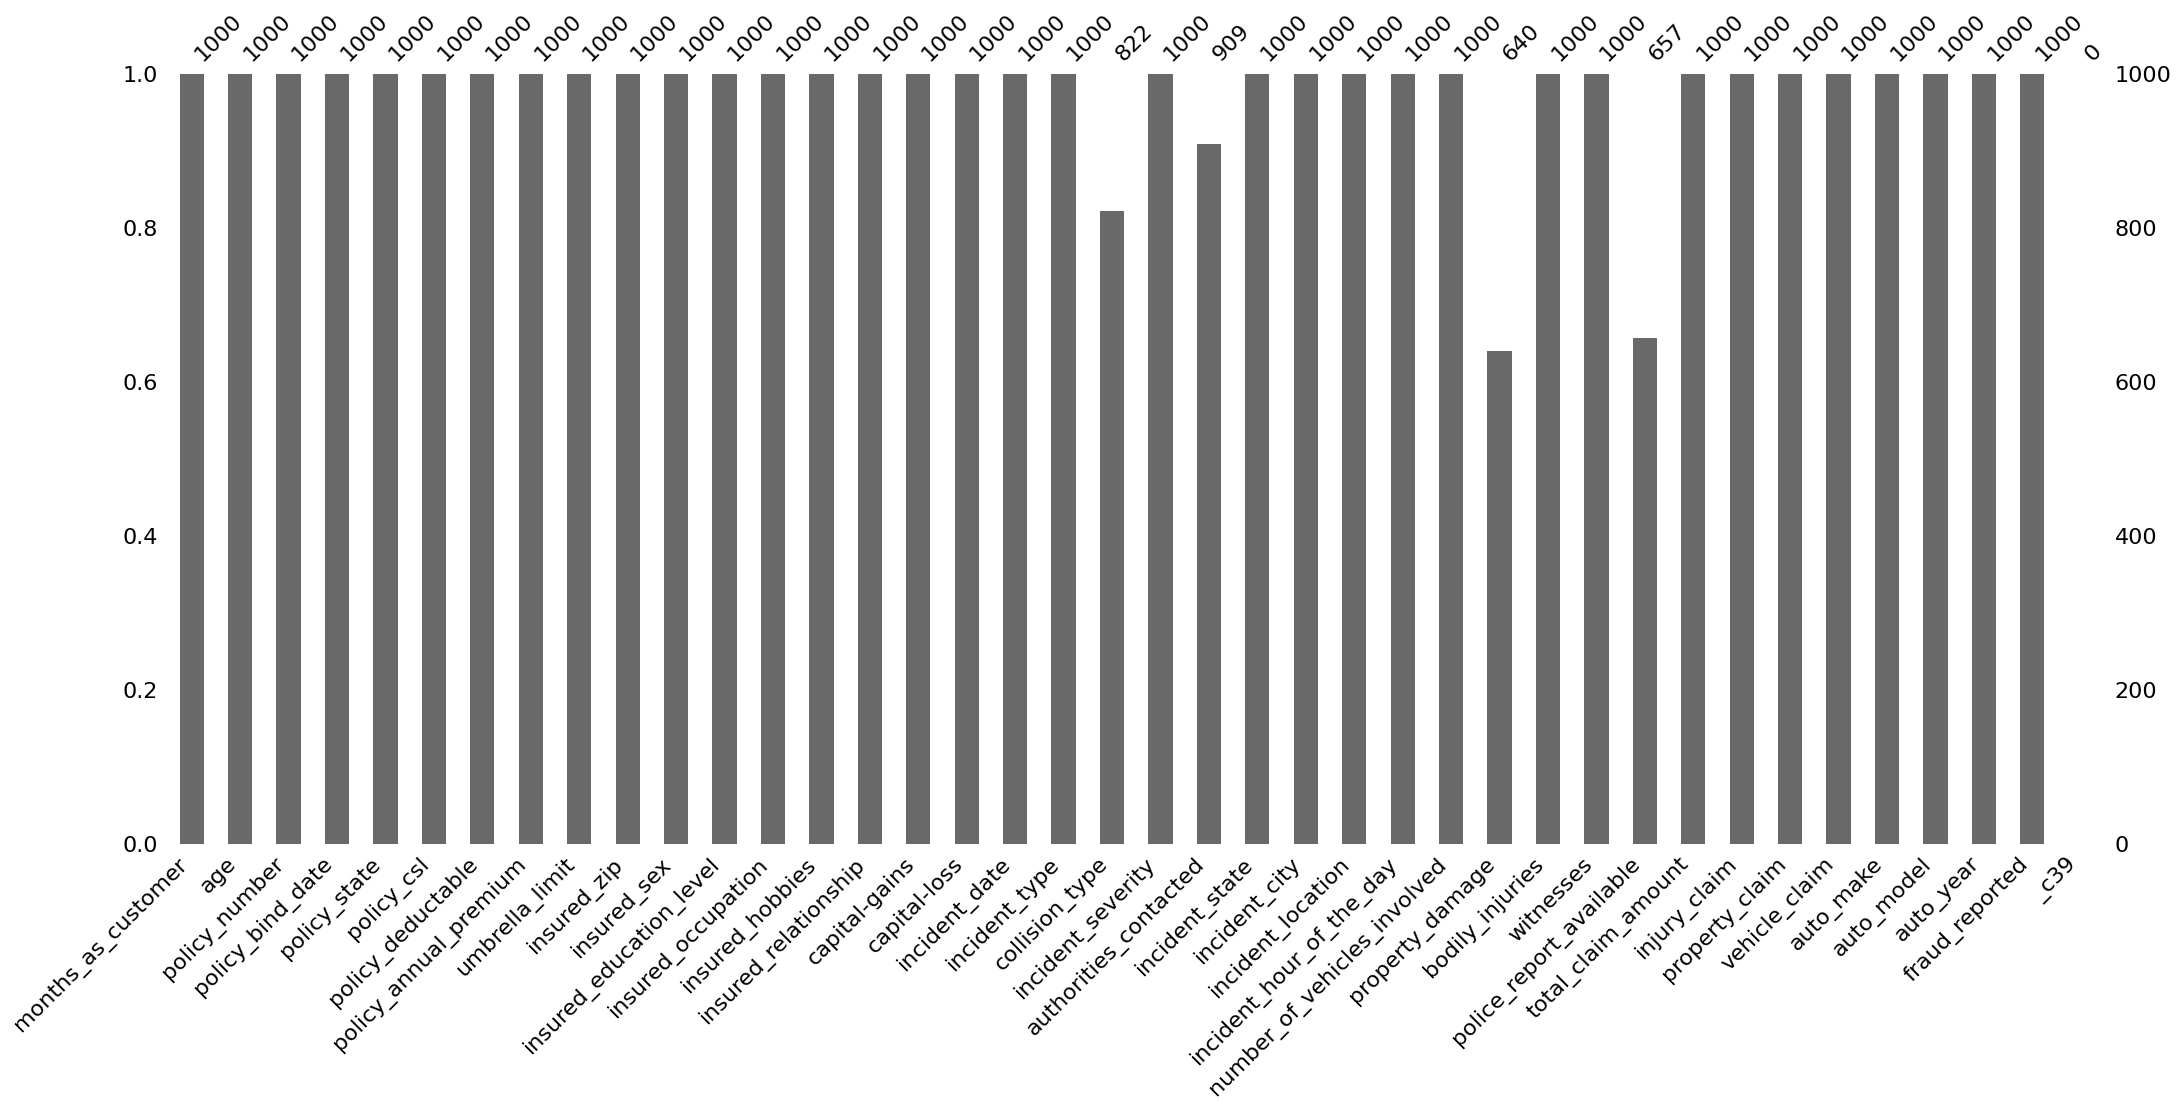

In [9]:
import missingno as msno

msno.bar(df)
plt.show()

Couldn't get imputation to work, filled missing data with mode. Will affect performance!

In [10]:
# from sklearn.impute import SimpleImputer
# simple_imputer = SimpleImputer(strategy='most_frequent')
# df = simple_imputer.fit_transform(df)


In [11]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])
df['authorities_contacted'] = df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0])

In [12]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

## Correlation Matrix

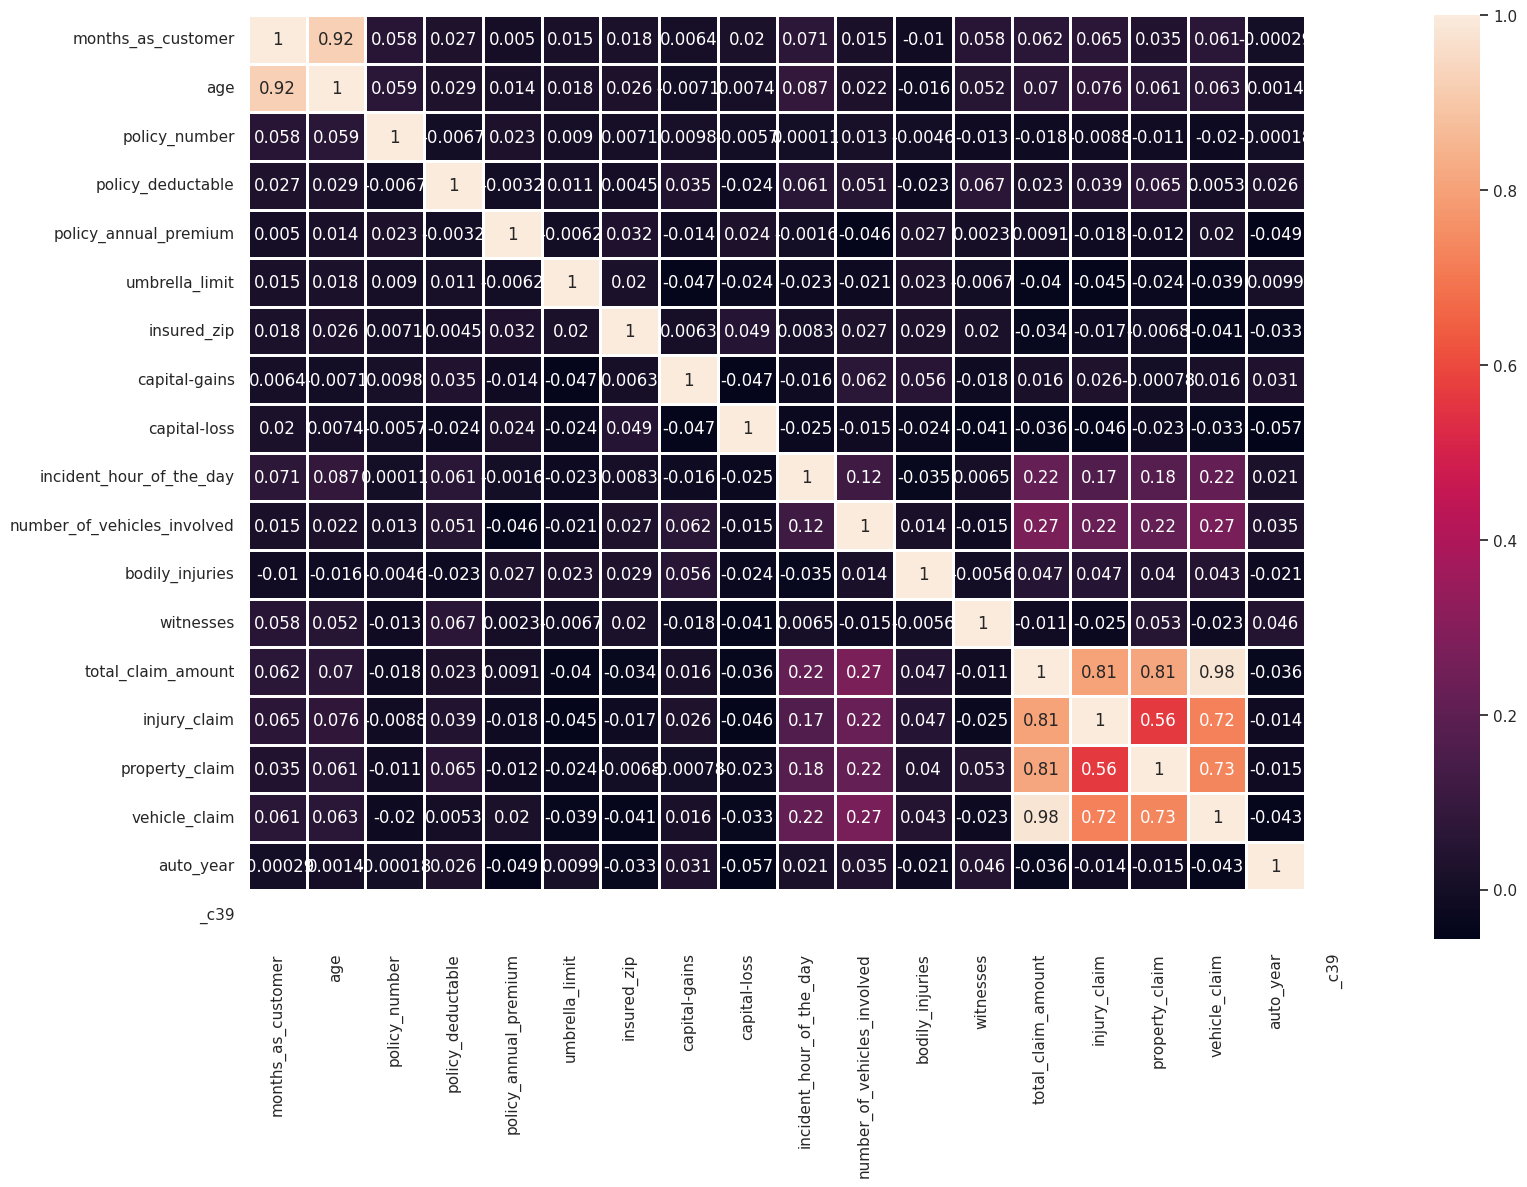

In [13]:
sns.set(style="white")
plt.figure(figsize = (18, 12))

corr = df.corr(numeric_only=True)

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

Cluster in bottom right is indicative that claims are usually filed together, such as injury combined with vehicle claims.

In [14]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

## Drop unnecessary columns

In [15]:
df.drop(['age','policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city', 'total_claim_amount','insured_hobbies','auto_make','auto_model','auto_year', '_c39'], inplace = True, axis = 1)
df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

## Split into X and Y for features and labels

In [17]:
X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

# ***Categorical and Numerical***

## Categorical

In [18]:
cat_df = X.select_dtypes(include = ['object'])
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO


In [19]:
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [20]:
cat_df = pd.get_dummies(cat_df, drop_first = True)
cat_df.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,True,False,True,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,True,True
1,True,False,True,False,False,False,True,False,False,False,...,True,False,True,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,...,True,False,True,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
4,False,True,True,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,True,False,False


## Numerical

In [21]:
num_df = X.select_dtypes(include = ['int64'])
num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550


## Combine

In [22]:
X = pd.concat([num_df, cat_df], axis = 1)
X.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,...,False,True,False,False,False,False,False,True,True,True
1,228,2000,5000000,0,0,8,1,0,0,780,...,True,False,True,False,False,False,False,True,False,False
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,True,False,True,False,False,False,False,True,False,False
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,False,False,False,False,False,False,False,True,False,False
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,True,False,True,False,False,False,False,True,False,False


# Check Data Distribution

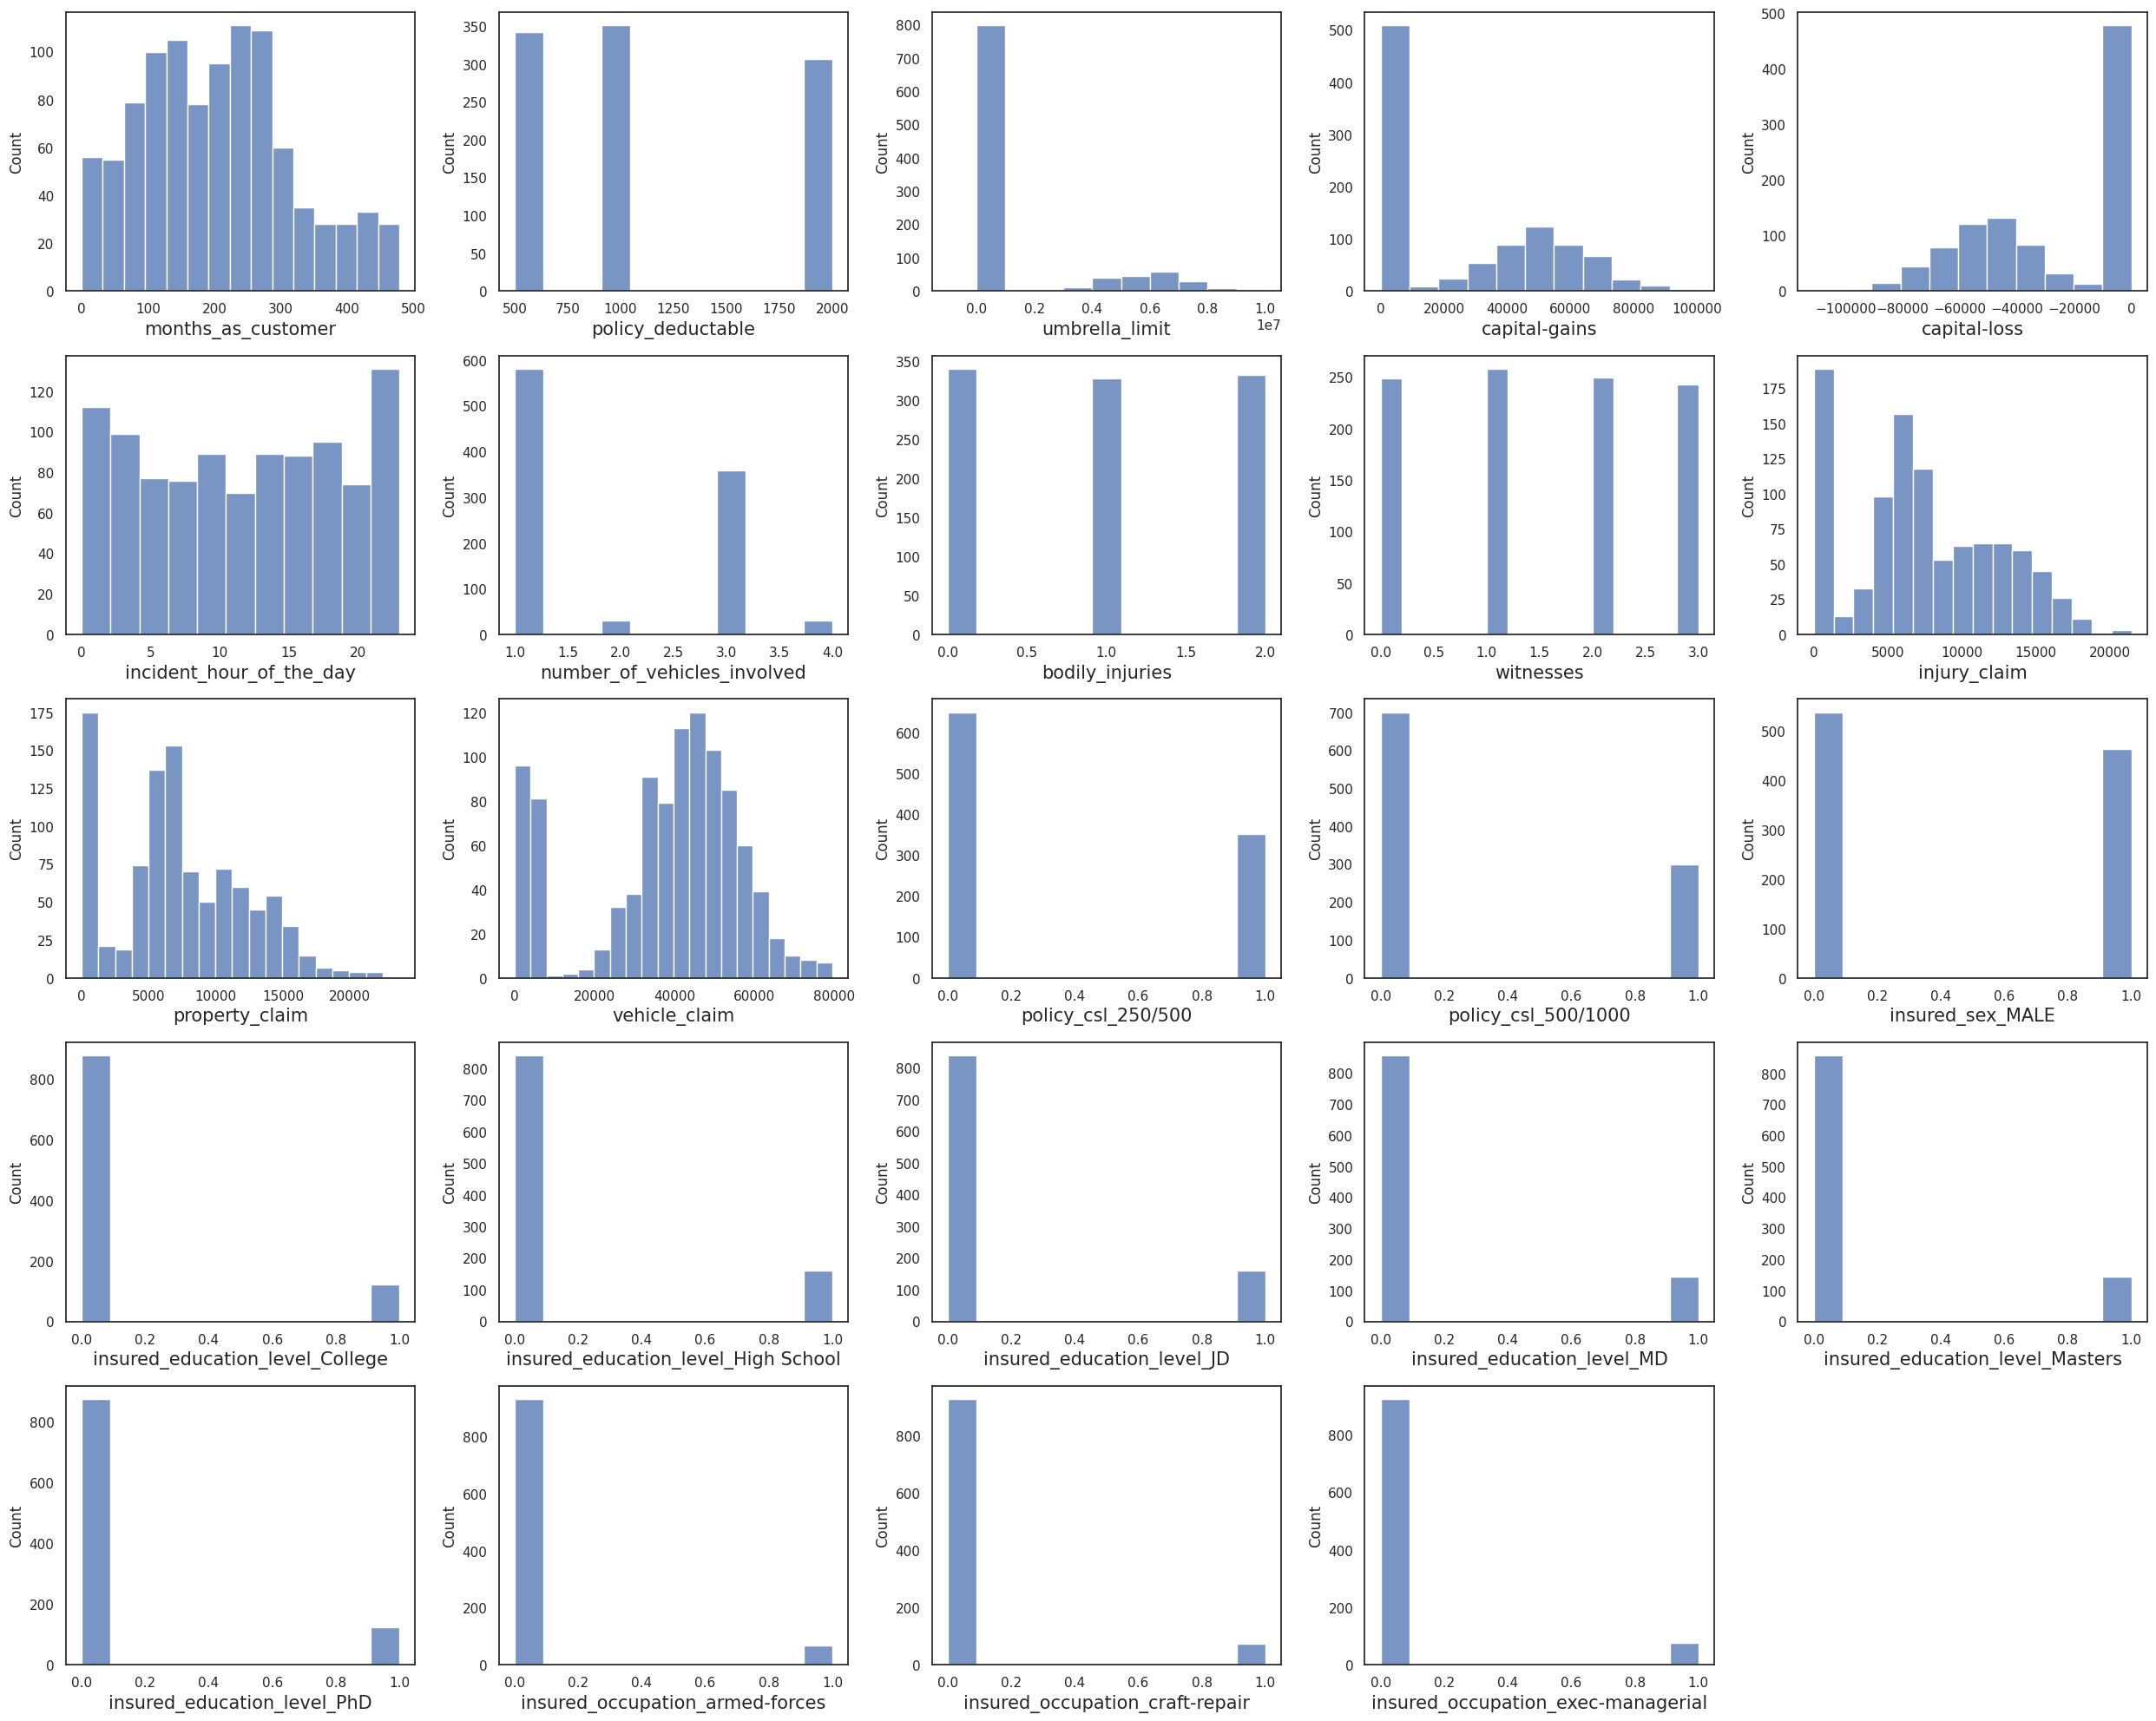

In [23]:
# Check Data Distribution (distPlot)
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.histplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

# Check for Outliers

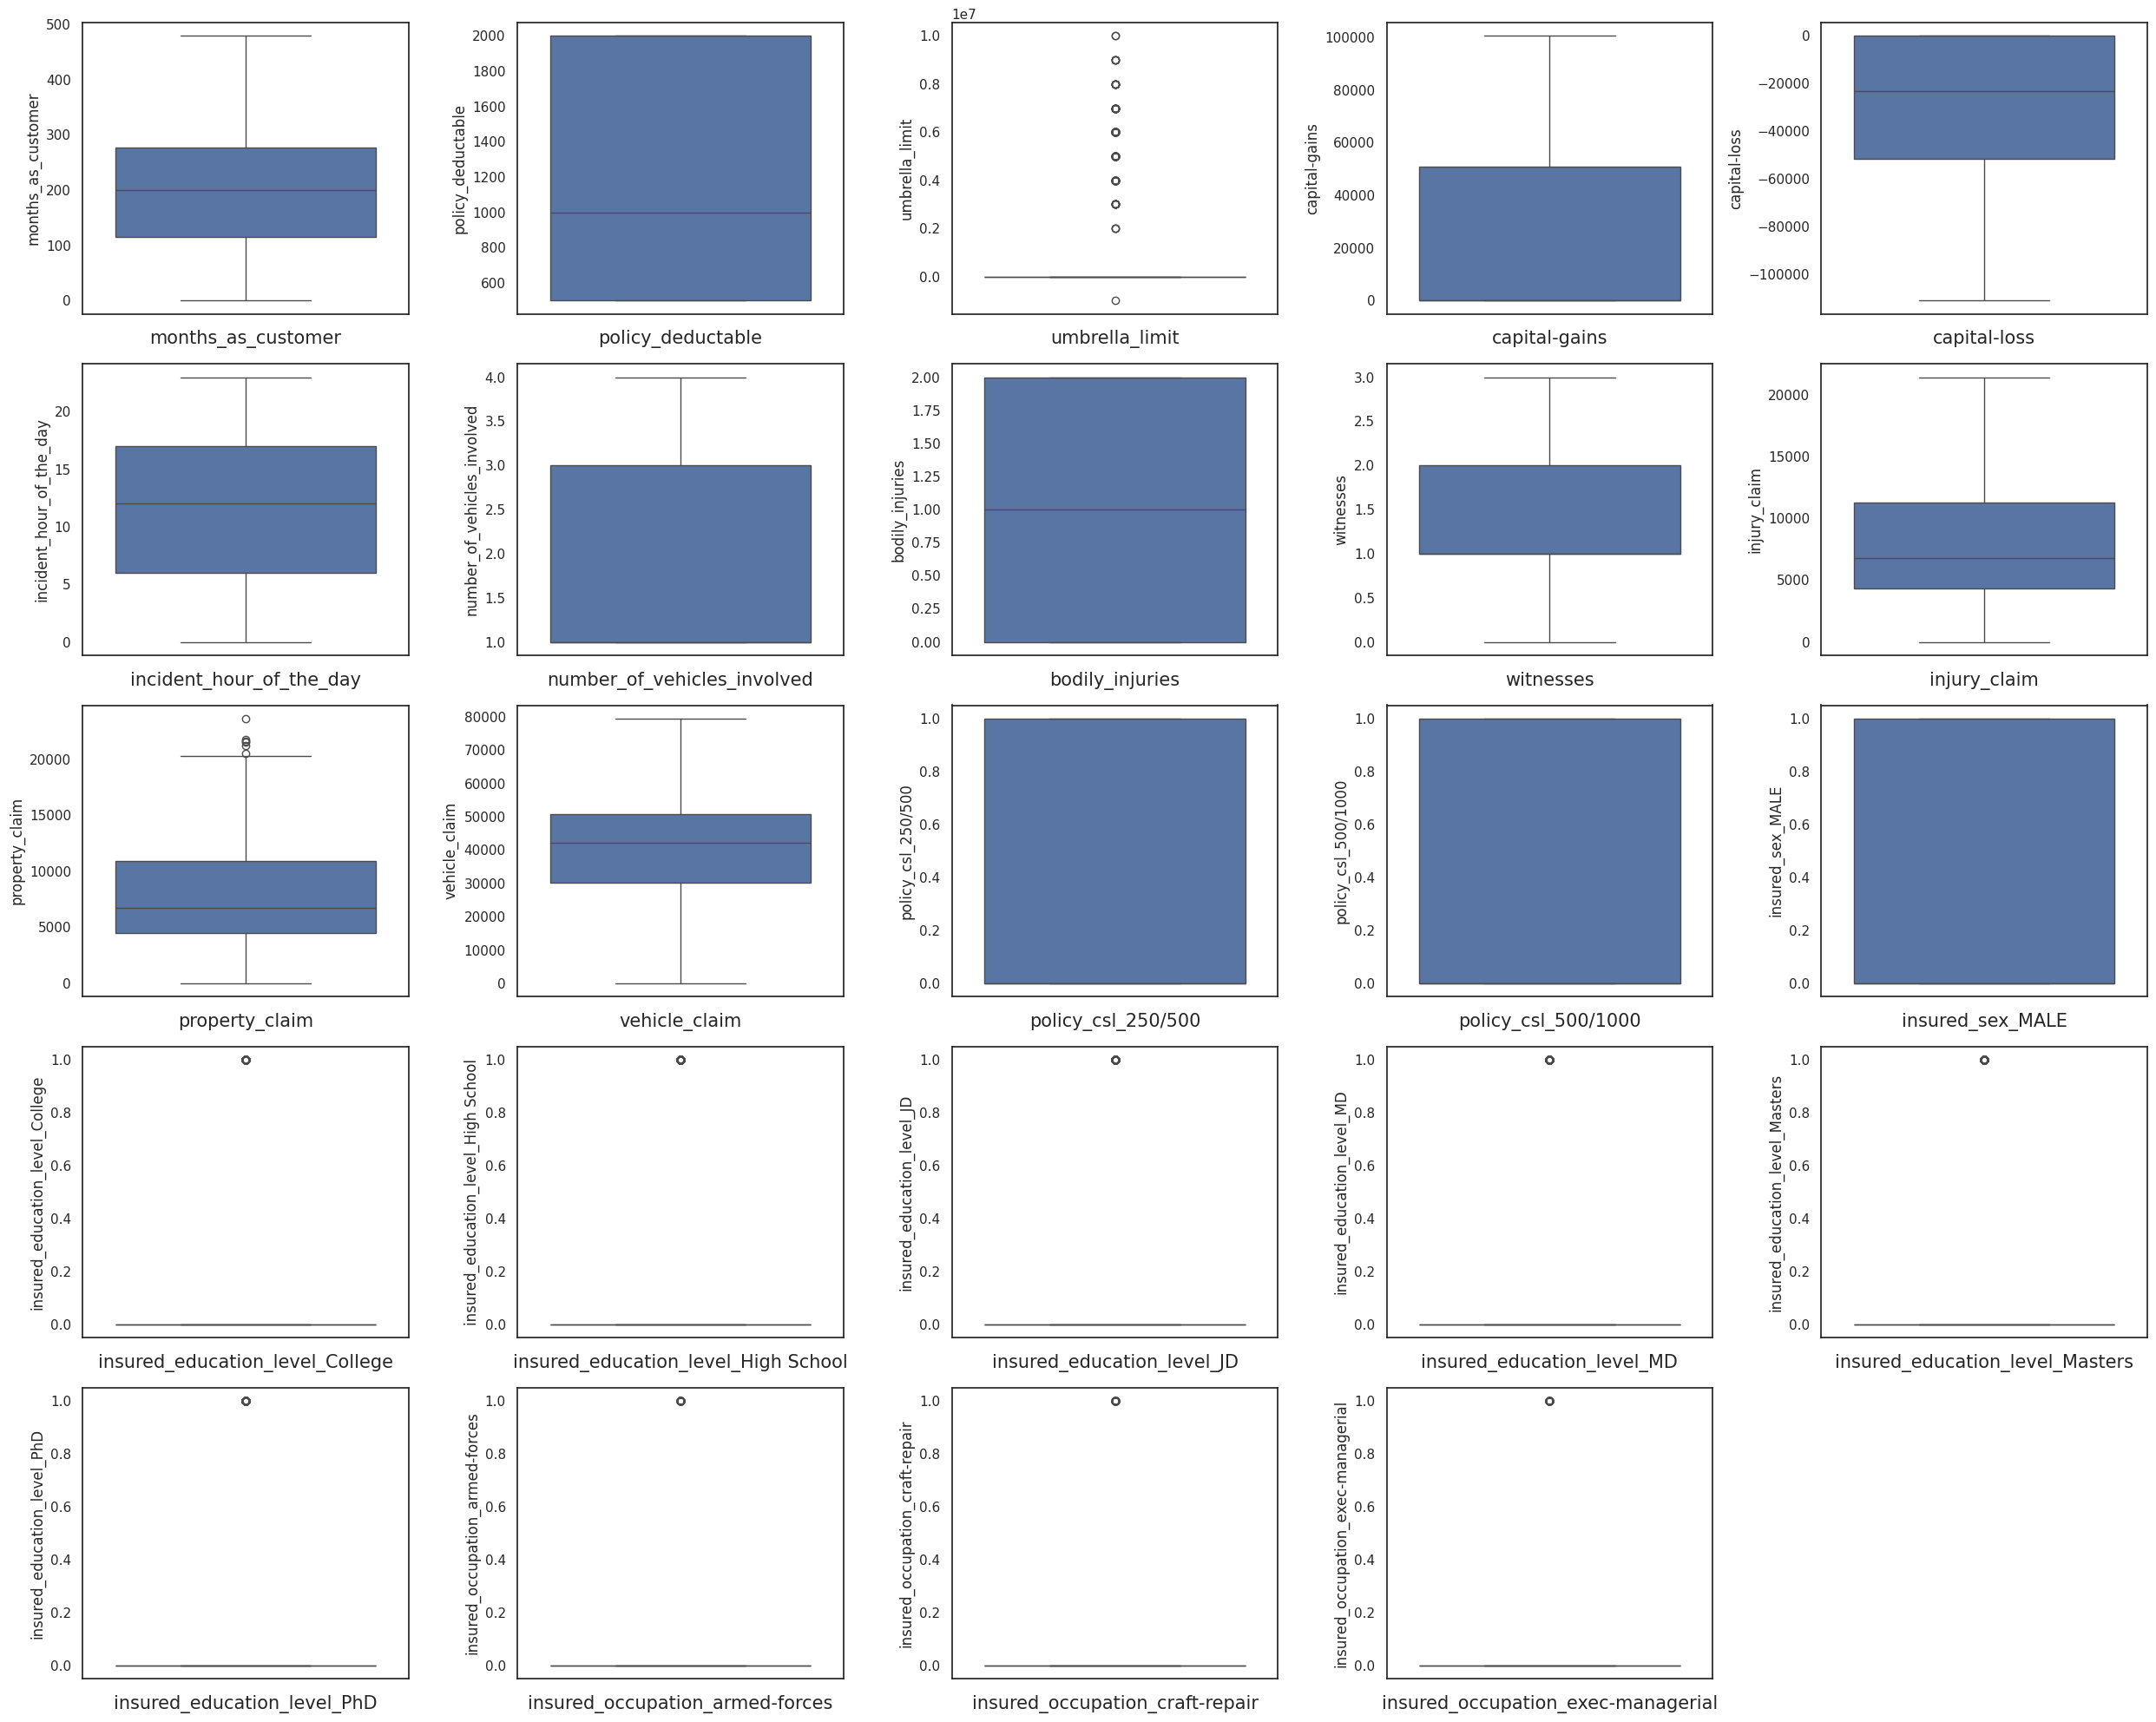

In [24]:
# Check boxplot for outliers
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1
plt.tight_layout()
plt.show()

# Split Training and Testing

Using a 75% train and 25% test split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [26]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
98,295,1000,0,0,0,6,1,1,2,900,...,True,False,False,False,True,False,False,True,False,True
231,298,1000,6000000,36900,-55000,18,1,2,3,3050,...,False,True,True,False,False,False,False,True,False,True
863,91,1000,0,52700,0,15,3,0,2,7420,...,False,False,True,False,False,False,True,False,False,False
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,True,False,True,False,False,False,False,True,False,False
947,465,500,6000000,0,0,7,1,0,3,4840,...,False,True,True,False,False,False,True,False,False,False


## Standard Scaling



This is used to transform the values of features or variables in a dataset to a similar scale. The purpose is to ensure that all features contribute equally to the model and to avoid the domination of features with larger values.

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_df = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

scaled_data = scaler.fit_transform(num_df)
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
98,0.777555,-0.244394,-0.470530,-0.921597,0.910425,-0.796682,-0.813148,0.046143,0.445308,-1.331012,-1.316618,-1.791978
231,0.803392,-0.244394,2.166311,0.417300,-1.029812,0.931896,-0.813148,1.282119,1.345525,-0.894060,-0.239445,-0.689389
863,-0.979334,-0.244394,-0.470530,0.990595,0.910425,0.499751,1.147819,-1.189833,0.445308,-0.005929,0.033992,1.163810
4,0.200538,-0.244394,2.166311,1.473179,-0.712318,1.219992,-0.813148,-1.189833,-0.454910,-1.249719,-1.368405,-1.741620
947,2.241630,-1.051863,2.166311,-0.921597,0.910425,-0.652634,-0.813148,-1.189833,1.345525,-0.530272,-0.500452,-0.186862


In [28]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)
X_train = pd.concat([scaled_num_df, X_train], axis = 1)
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
98,0.777555,-0.244394,-0.470530,-0.921597,0.910425,-0.796682,-0.813148,0.046143,0.445308,-1.331012,...,True,False,False,False,True,False,False,True,False,True
231,0.803392,-0.244394,2.166311,0.417300,-1.029812,0.931896,-0.813148,1.282119,1.345525,-0.894060,...,False,True,True,False,False,False,False,True,False,True
863,-0.979334,-0.244394,-0.470530,0.990595,0.910425,0.499751,1.147819,-1.189833,0.445308,-0.005929,...,False,False,True,False,False,False,True,False,False,False
4,0.200538,-0.244394,2.166311,1.473179,-0.712318,1.219992,-0.813148,-1.189833,-0.454910,-1.249719,...,True,False,True,False,False,False,False,True,False,False
947,2.241630,-1.051863,2.166311,-0.921597,0.910425,-0.652634,-0.813148,-1.189833,1.345525,-0.530272,...,False,True,True,False,False,False,True,False,False,False


# Models

## Support Vector Classifier

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Support Vector Classifier is : 0.8693333333333333
Test accuracy of Support Vector Classifier is : 0.772
[[193   0]
 [ 57   0]]
              precision    recall  f1-score   support

           N       0.77      1.00      0.87       193
           Y       0.00      0.00      0.00        57

    accuracy                           0.77       250
   macro avg       0.39      0.50      0.44       250
weighted avg       0.60      0.77      0.67       250



Decent overall results. 87% training and 77% test accuracies, Precision relatively low in comparison to recall, decent F-1 Score

## K-Nearest Neighbors Classifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of KNN is : 0.748
Test accuracy of KNN is : 0.772
[[193   0]
 [ 57   0]]
              precision    recall  f1-score   support

           N       0.77      1.00      0.87       193
           Y       0.00      0.00      0.00        57

    accuracy                           0.77       250
   macro avg       0.39      0.50      0.44       250
weighted avg       0.60      0.77      0.67       250



Average overall results. 75% training and 77% test accuracies, Precision recall and F-1 are all fair.

## Decision Tree Classifier


In [32]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.376
[[ 70 123]
 [ 33  24]]
              precision    recall  f1-score   support

           N       0.68      0.36      0.47       193
           Y       0.16      0.42      0.24        57

    accuracy                           0.38       250
   macro avg       0.42      0.39      0.35       250
weighted avg       0.56      0.38      0.42       250



Extremely poor results. Perfect training accuracy but an abysmally low 37% test accuracy. Precision, Recall, and F-1 all subpar

## Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion='entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest is : 0.9746666666666667
Test accuracy of Random Forest is : 0.776
[[168  25]
 [ 31  26]]
              precision    recall  f1-score   support

           N       0.84      0.87      0.86       193
           Y       0.51      0.46      0.48        57

    accuracy                           0.78       250
   macro avg       0.68      0.66      0.67       250
weighted avg       0.77      0.78      0.77       250



Solid results. 97% training and 77% test. Precision, recall, and F-1 are all decent.

## Convolutional Neural Network

In [34]:
X_train.shape[1:]

(52,)

In [35]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

X_train = X_train.astype(np.float32)

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on the y_train data
label_encoder.fit(y_train)

# Transform the y_train data using the encoder
y_train = label_encoder.transform(y_train)

# Convert y_train to categorical format
y_train = to_categorical(y_train)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import RMSprop


input_shape = X_train.shape[1:]

# Create the model
model = Sequential()

# Add dense layers
model.add(Dense(256, activation='relu', input_shape=input_shape))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               13568     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 54850 (214.26 KB)
Trainable params: 54850 (214.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=25, validation_split=0.2)

Epoch 1/25
19/19 [==============================] - 1s 25ms/step - loss: 0.6427 - accuracy: 0.7550 - val_loss: 0.6407 - val_accuracy: 0.7067
Epoch 2/25
19/19 [==============================] - 0s 4ms/step - loss: 0.6190 - accuracy: 0.7567 - val_loss: 0.6251 - val_accuracy: 0.7067
Epoch 3/25
19/19 [==============================] - 0s 5ms/step - loss: 0.6002 - accuracy: 0.7567 - val_loss: 0.6134 - val_accuracy: 0.7067
Epoch 4/25
19/19 [==============================] - 0s 4ms/step - loss: 0.5851 - accuracy: 0.7567 - val_loss: 0.6048 - val_accuracy: 0.7067
Epoch 5/25
19/19 [==============================] - 0s 4ms/step - loss: 0.5733 - accuracy: 0.7567 - val_loss: 0.5987 - val_accuracy: 0.7067
Epoch 6/25
19/19 [==============================] - 0s 4ms/step - loss: 0.5643 - accuracy: 0.7567 - val_loss: 0.5943 - val_accuracy: 0.7067
Epoch 7/25
19/19 [==============================] - 0s 4ms/step - loss: 0.5569 - accuracy: 0.7567 - val_loss: 0.5914 - val_accuracy: 0.7067
Epoch 8/25
19/19 [=

In [38]:
# Perform Transformation and Encoding on Test Set

X_test = X_test.astype(np.float32)

label_encoder.fit(y_test)

y_test = label_encoder.transform(y_test)

y_test = to_categorical(y_test)

In [39]:
cnn_test_loss, cnn_test_acc = model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 3ms/step - loss: 46605.6680 - accuracy: 0.7720


Comparable results to 3/4 Basic Models. Could be refined and improved.

In [40]:
models = pd.DataFrame({
    'Model' : ['Support Vector Classifier', 'K-Nearest Neighbor Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'Convolutional Neural Network'],
    'Score' : [svc_test_acc, knn_test_acc, dtc_test_acc, rand_clf_test_acc, cnn_test_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest Classifier,0.776
4,Convolutional Neural Network,0.772
0,Support Vector Classifier,0.772
1,K-Nearest Neighbor Classifier,0.772
2,Decision Tree Classifier,0.376


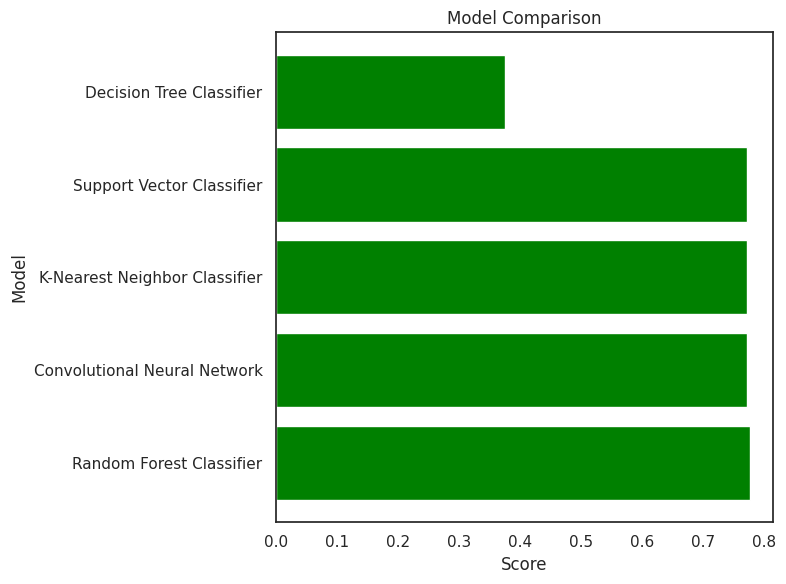

In [41]:
models_sorted = models.sort_values('Score')

fig, ax = plt.subplots(figsize=(8, 6))

ax.barh(models_sorted['Model'], models_sorted['Score'], color='green')

ax.set_xlabel('Score')
ax.set_ylabel('Model')
ax.set_title('Model Comparison')
ax.invert_yaxis()

plt.tight_layout()
plt.show()

As you can see, the Random Forest Classifier performs the best. This was somewhat predictable as Random Forest usually performs well with binary classification.

All models except for the Decision Tree performed almost identically to each other on the test set. With more tuning and refining, it is possible that the CNN could beat the basic models.

Other models like XGBoost, or Naive Bayes could potentially yield better results as they are comparable in performance for binary classification

Additionally, I need to find a legitimate imputation method, as the mode is definitely skewing results and affecting the accuracy of each model.